In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

About Dataset
This dataset contains extensive health information for 2,392 patients diagnosed with Asthma Disease, uniquely identified with IDs ranging from 5034 to 7425. It includes demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Asthma, develop predictive models, and conduct statistical analyses.

Table of Contents
Patient Information
Patient ID
Demographic Details
Lifestyle Factors
Environmental and Allergy Factors
Medical History
Clinical Measurements
Symptoms
Diagnosis Information
Confidential Information
Patient Information
Patient ID
PatientID: A unique identifier assigned to each patient (5034 to 7425).
Demographic Details
Age: The age of the patients ranges from 5 to 80 years.
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher
Lifestyle Factors

BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.
SleepQuality: Sleep quality score, ranging from 4 to 10.
Environmental and Allergy Factors
PollutionExposure: Exposure to pollution, score from 0 to 10.
PollenExposure: Exposure to pollen, score from 0 to 10.
DustExposure: Exposure to dust, score from 0 to 10.
PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.
Medical History
FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.
Clinical Measurements
LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
Symptoms
Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.
Diagnosis Information
Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.
Confidential Information
DoctorInCharge: This column contains confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients

In [2]:
df=pd.read_csv('../Datasets/asthma_disease_data.csv')
df.sample(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
1744,6778,62,1,0,1,22.387370,0,1.765012,9.945039,4.136360,...,2.259411,4.299134,1,1,0,1,1,1,0,Dr_Confid
832,5866,13,0,0,3,31.602225,0,5.186589,0.281505,6.961307,...,1.943244,2.784437,1,1,0,0,1,1,0,Dr_Confid
1078,6112,21,0,1,2,21.630413,0,7.931242,2.618573,4.090049,...,2.120060,1.849320,0,1,0,1,1,0,0,Dr_Confid
2238,7272,7,1,0,0,20.021743,0,4.229636,0.397374,5.272439,...,2.422281,5.865077,1,1,1,1,1,1,1,Dr_Confid
1489,6523,45,0,0,1,36.101463,0,4.250025,5.159219,7.977185,...,2.048736,1.689445,1,1,0,1,0,1,0,Dr_Confid


In [3]:
df.isna().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [4]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [5]:
df.drop(['DoctorInCharge','PatientID',],axis=1,inplace=True)

In [6]:
df.sample(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
2165,21,0,1,3,16.339185,1,7.889302,7.941241,9.604299,2.262656,...,1,2.949005,3.276920,0,0,0,1,0,1,1
769,23,1,0,0,21.747253,0,2.001914,6.838184,4.012811,9.879973,...,1,3.551720,5.897630,0,1,1,1,1,1,0
2206,5,0,0,3,32.419103,0,5.719808,0.661500,5.857242,4.066618,...,0,2.747863,3.415144,1,1,0,0,1,1,1
1852,39,1,1,0,16.634715,0,1.824046,2.043456,4.960710,3.677566,...,0,3.840182,3.750479,0,0,1,0,1,1,0
271,79,0,2,1,20.455018,0,8.557270,5.690571,5.889779,3.503976,...,0,2.265625,1.822894,1,1,0,0,0,1,0


In [7]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [8]:
correleation=df.corr()
correleation

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
Age,1.000000,-0.003205,0.020022,-0.006711,0.016184,-0.009309,0.000053,0.004262,0.002718,-0.042311,...,0.019516,-0.007535,0.009594,0.007899,0.024534,-0.006197,0.028948,-0.026368,0.016008,-0.015111
Gender,-0.003205,1.000000,0.019266,-0.026615,0.023856,-0.012545,0.021761,-0.015375,-0.023442,0.000744,...,-0.003373,0.013243,-0.027673,-0.012716,0.020916,0.000089,-0.008273,-0.004889,0.029384,0.003128
Ethnicity,0.020022,0.019266,1.000000,0.004130,0.013947,-0.007343,0.036608,0.009032,-0.010136,-0.037757,...,-0.015297,-0.017714,0.031680,-0.012132,0.018938,-0.013025,-0.026594,0.014656,0.014656,0.017124
EducationLevel,-0.006711,-0.026615,0.004130,1.000000,0.004501,0.013126,-0.015380,-0.037059,0.017655,0.026831,...,0.024057,-0.003145,-0.001876,0.014067,0.009490,-0.031617,-0.017651,-0.000744,-0.008214,0.008185
BMI,0.016184,0.023856,0.013947,0.004501,1.000000,0.004890,-0.012046,-0.014996,-0.012891,-0.028962,...,0.010484,-0.010356,0.003358,0.045725,0.015136,-0.009908,-0.003992,-0.001453,0.011947,-0.012522
Smoking,-0.009309,-0.012545,-0.007343,0.013126,0.004890,1.000000,0.013838,-0.027010,-0.012348,0.011038,...,0.034271,0.015578,0.016444,-0.005121,-0.059075,-0.011109,-0.013507,0.014152,-0.002629,-0.019321
PhysicalActivity,0.000053,0.021761,0.036608,-0.015380,-0.012046,0.013838,1.000000,0.049487,0.007208,-0.029539,...,-0.035085,0.015749,-0.029711,0.013758,-0.024513,-0.028887,0.000670,-0.009144,-0.004371,0.005066
DietQuality,0.004262,-0.015375,0.009032,-0.037059,-0.014996,-0.027010,0.049487,1.000000,0.014355,0.006955,...,0.020919,-0.007315,-0.002165,0.039474,0.035641,0.012674,-0.013483,0.022328,-0.024092,-0.003149
SleepQuality,0.002718,-0.023442,-0.010136,0.017655,-0.012891,-0.012348,0.007208,0.014355,1.000000,-0.029374,...,-0.035456,-0.003637,0.000808,0.010577,-0.011363,-0.006576,0.015291,-0.005175,-0.026065,0.018022
PollutionExposure,-0.042311,0.000744,-0.037757,0.026831,-0.028962,0.011038,-0.029539,0.006955,-0.029374,1.000000,...,0.006201,-0.024337,0.027617,-0.007375,0.019123,0.027246,0.005673,0.014951,-0.009472,-0.004535


<Axes: >

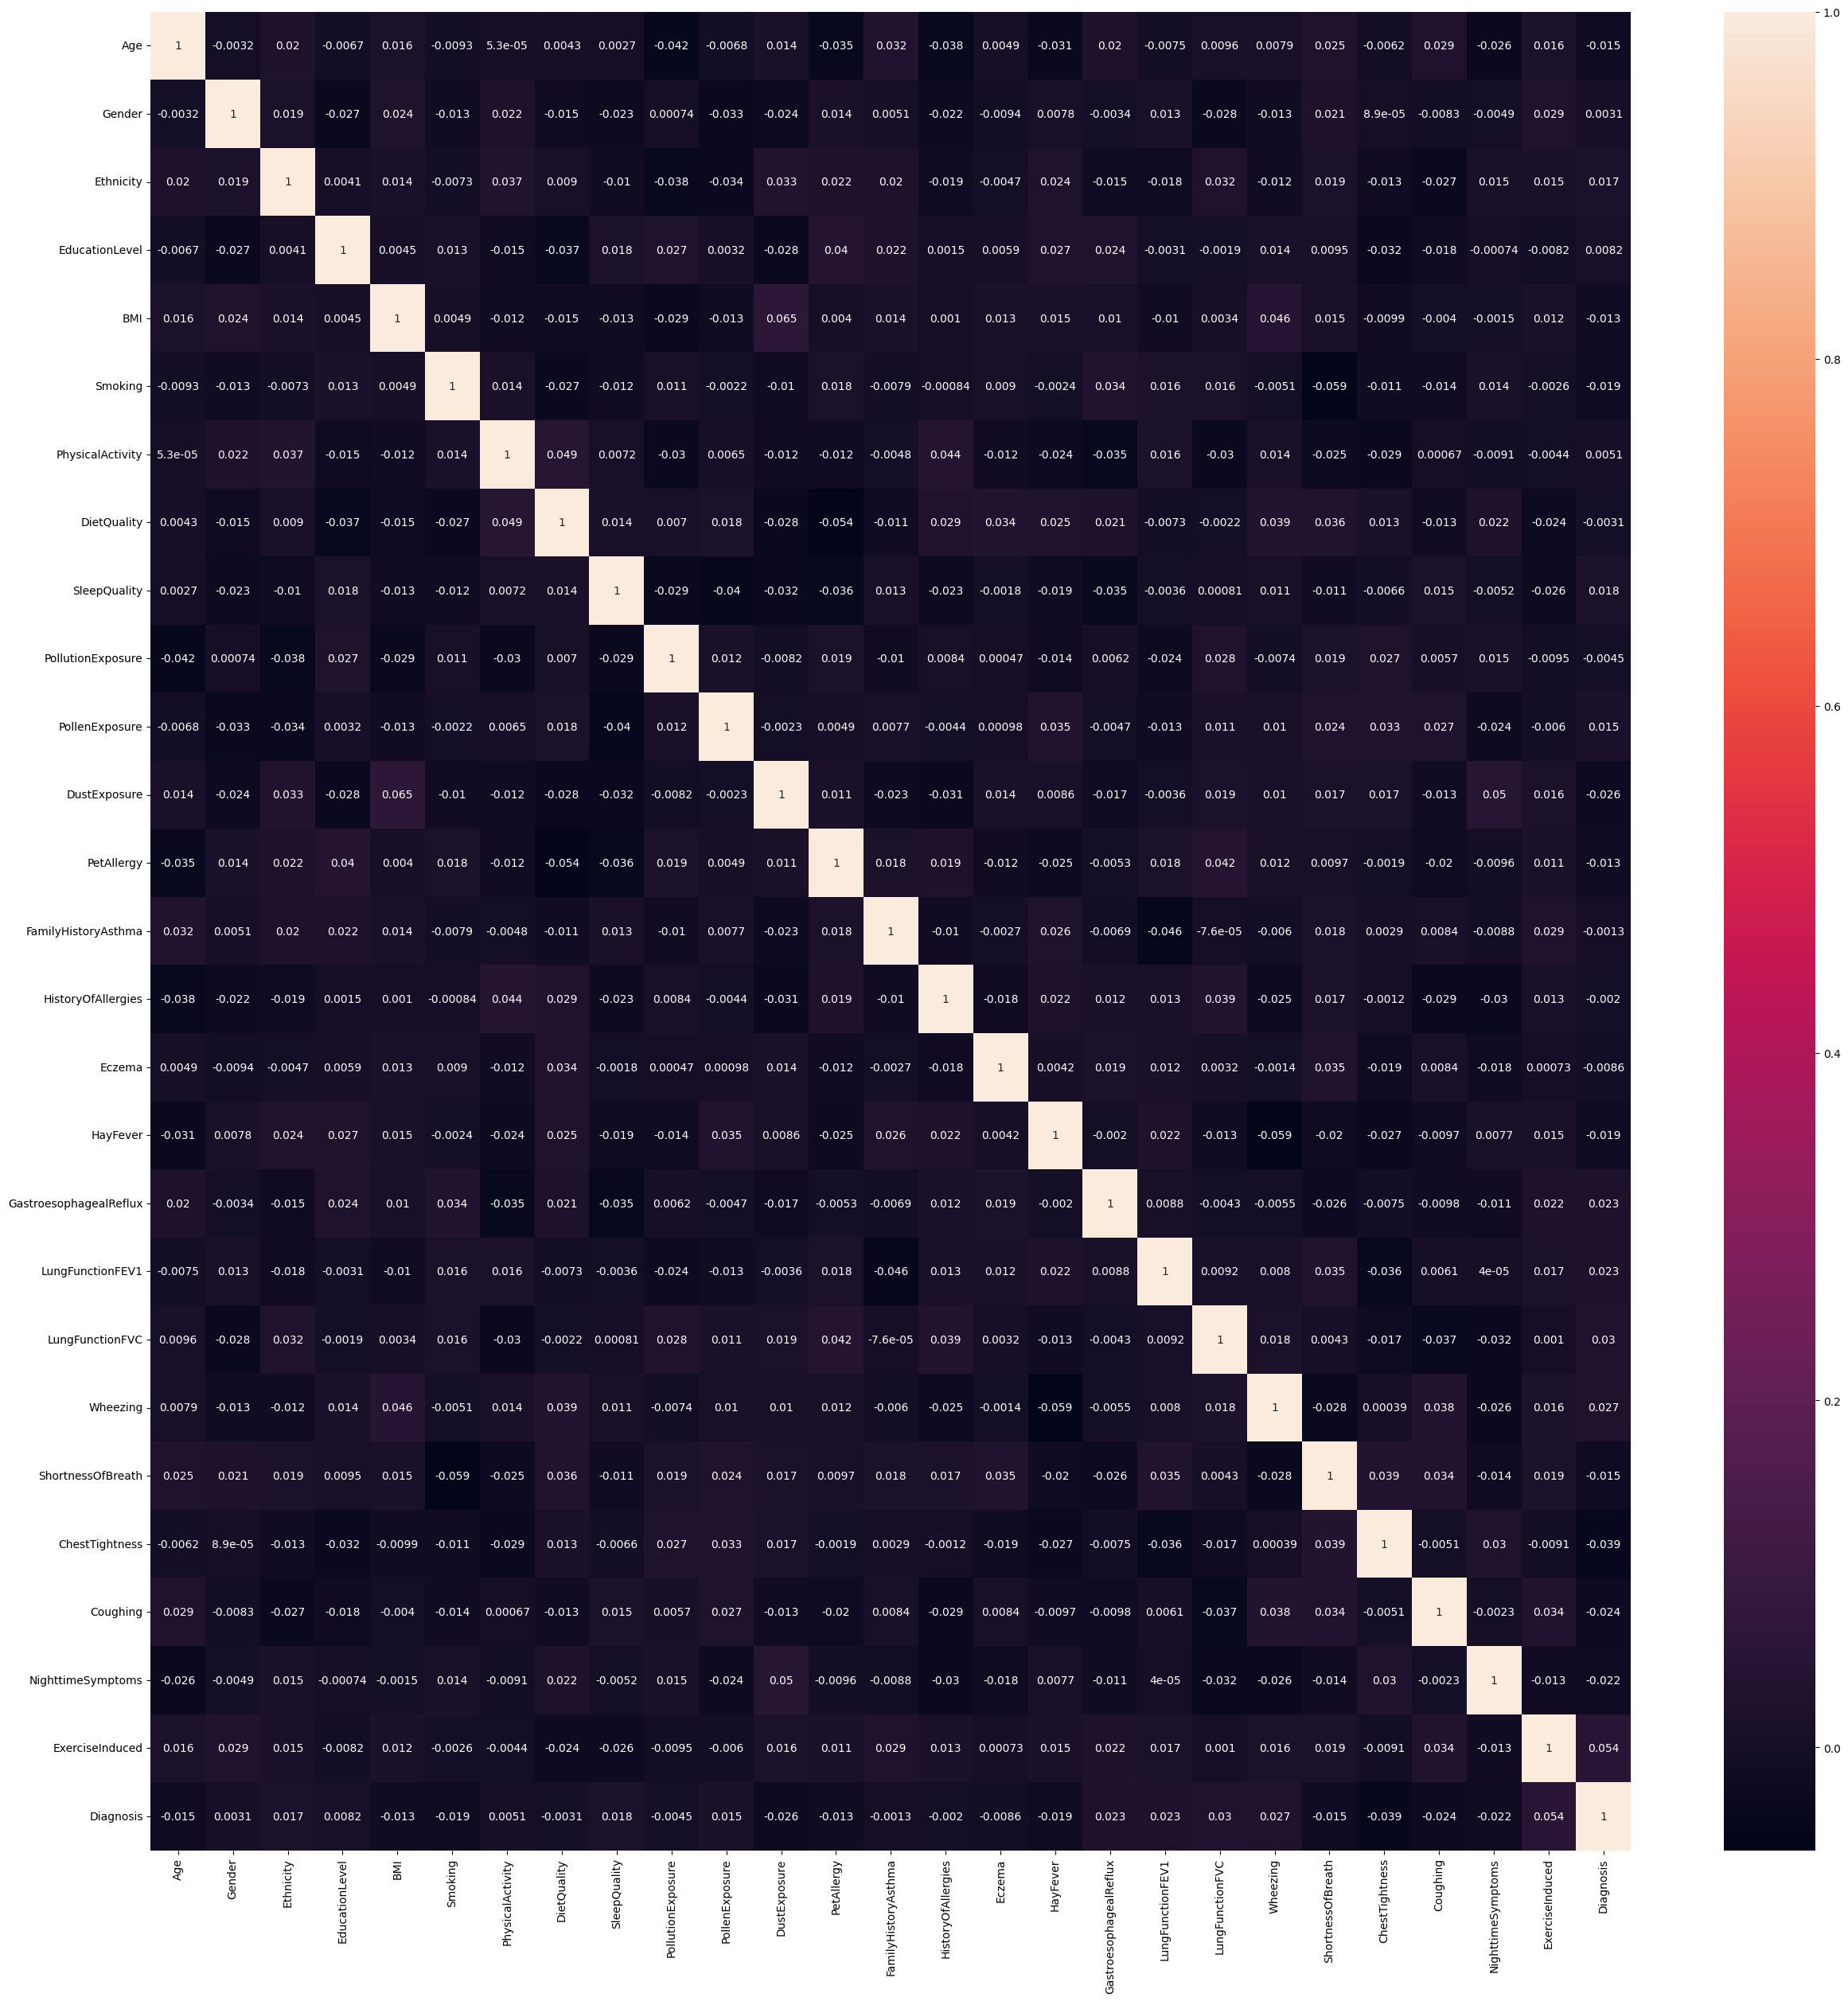

In [9]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(correleation,annot=True)

In [10]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [11]:
df.drop(['Age','EducationLevel','FamilyHistoryAsthma','DietQuality','HistoryOfAllergies','GastroesophagealReflux','LungFunctionFEV1', 'LungFunctionFVC'],axis=1,inplace=True)


In [12]:
df.columns

Index(['Gender', 'Ethnicity', 'BMI', 'Smoking', 'PhysicalActivity',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'Eczema', 'HayFever', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [13]:
df.drop(['Wheezing','HayFever','Eczema'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Gender', 'Ethnicity', 'BMI', 'Smoking', 'PhysicalActivity',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')

In [15]:
df.sample(5)

,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
258,0,0,27.046511,0,3.499035,8.865346,0.221807,3.715103,5.325219,0,0,1,1,1,1,0
424,0,0,34.128020,1,7.633465,9.655476,8.393108,5.634014,4.044595,0,0,1,1,1,0,0
1316,0,0,30.092258,0,0.315085,7.865089,9.807389,1.126404,7.353874,0,0,0,0,1,0,0
2332,1,0,32.201714,0,4.836826,9.914253,5.598008,9.534142,4.661706,0,1,1,0,0,1,1
1719,0,2,37.557256,0,6.846240,4.163659,9.191688,7.910777,9.628527,0,1,1,0,0,1,0


In [16]:
X=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
x_train[0:5]

,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
1428,0,3,19.767985,0,4.348719,6.812669,2.857622,6.022584,4.446010,0,1,1,1,1,0
2384,0,0,31.821008,1,8.516835,9.442670,9.240483,8.298979,2.287043,0,0,0,0,1,1
149,0,0,38.766504,0,1.597617,4.692634,0.756546,2.155485,5.364329,0,1,0,0,0,0
1448,0,0,37.503106,0,0.990294,6.866633,1.697011,0.696289,2.918207,0,1,0,1,1,1
2164,0,0,22.697123,0,4.238294,7.059210,1.368226,7.404263,0.686262,1,1,1,0,1,1


In [19]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
x_train_scaled[0]

array([-0.98392428,  2.36132046, -1.04037666, -0.41061064, -0.23947125,
       -0.12437026, -0.7478417 ,  0.32489211, -0.19356466, -0.44987602,
        0.98598425,  0.99115257,  1.01421498,  0.80745661, -1.25211231])

In [21]:
y_test.value_counts()

Diagnosis
0    459
1     20
Name: count, dtype: int64

In [22]:
x_train.shape

(1913, 15)

In [23]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the ANN architecture
def create_ann():
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(15,)),  # Adjusted input shape to 15
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper for the ANN
ann_classifier = KerasClassifier(
    model=create_ann,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )],
    verbose=1
)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)

# First train individual models
print("Training ANN...")
ann_classifier.fit(x_train, y_train)

print("\nTraining XGBoost...")
xgb_classifier.fit(x_train, y_train)

# Create and train voting classifier with both hard and soft voting
voting_clf_soft = VotingClassifier(
    estimators=[('ann', ann_classifier), ('xgb', xgb_classifier)],
    voting='soft'
)

voting_clf_hard = VotingClassifier(
    estimators=[('ann', ann_classifier), ('xgb', xgb_classifier)],
    voting='hard'
)

print("\nTraining Voting Classifier (Soft)...")
voting_clf_soft.fit(x_train, y_train)

print("\nTraining Voting Classifier (Hard)...")
voting_clf_hard.fit(x_train, y_train)

# Get predictions from all models
y_pred_ann = ann_classifier.predict(x_test)
y_pred_xgb = xgb_classifier.predict(x_test)
y_pred_voting_soft = voting_clf_soft.predict(x_test)
y_pred_voting_hard = voting_clf_hard.predict(x_test)

# Calculate accuracies
print("\nModel Accuracies:")
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Voting Classifier (Soft) Accuracy:", accuracy_score(y_test, y_pred_voting_soft))
print("Voting Classifier (Hard) Accuracy:", accuracy_score(y_test, y_pred_voting_hard))


Training ANN...
Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9496 - loss: 0.2484 - val_accuracy: 0.9452 - val_loss: 0.2285
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.2144 - val_accuracy: 0.9452 - val_loss: 0.2233
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9586 - loss: 0.1781 - val_accuracy: 0.9452 - val_loss: 0.2265
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.2083 - val_accuracy: 0.9452 - val_loss: 0.2234
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9549 - loss: 0.1860 - val_accuracy: 0.9452 - val_loss: 0.2200
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.2189 - val_accuracy: 0.9452 - val_loss: 0.2241
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9423 - loss: 0.2115 - val_accuracy: 0.9452 - val_loss: 0.2208
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9565 - loss: 0.1814 - val_accuracy: 0.9452 - val_loss: 0.2230
Epo

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4857 - val_accuracy: 0.9452 - val_loss: 0.2398
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9474 - loss: 0.2300 - val_accuracy: 0.9452 - val_loss: 0.2263
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9516 - loss: 0.2011 - val_accuracy: 0.9452 - val_loss: 0.2210
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.2307 - val_accuracy: 0.9452 - val_loss: 0.2163
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9481 - loss: 0.2040 - val_accuracy: 0.9452 - val_loss: 0.2151
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9497 - loss: 0.1990 - val_accuracy: 0.9452 - val_loss: 0.2161
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9413 - loss: 0.2251 - val_accuracy: 0.9452 - val_loss: 0.2168
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9448 - loss: 0.2096 - val_accuracy: 0.9452 - val_loss: 0.2158
Epo

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9532 - loss: 0.2055 - val_accuracy: 0.9452 - val_loss: 0.2258
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9397 - loss: 0.2432 - val_accuracy: 0.9452 - val_loss: 0.2384
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9471 - loss: 0.2139 - val_accuracy: 0.9452 - val_loss: 0.2383
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9473 - loss: 0.2161 - val_accuracy: 0.9452 - val_loss: 0.2169
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9430 - loss: 0.2233 - val_accuracy: 0.9452 - val_loss: 0.2218
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9435 - loss: 0.2160 - val_accuracy: 0.9452 - val_loss: 0.2174
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9385 - loss: 0.2310 - val_accuracy: 0.9452 - val_loss: 0.2239
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9453 - loss: 0.2049 - val_accuracy: 0.9452 - val_loss: 0.2312
Epo

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Model Accuracies:
ANN Accuracy: 0.9582463465553236
XGBoost Accuracy: 0.9582463465553236
Voting Classifier (Soft) Accuracy: 0.9582463465553236
Voting Classifier (Hard) Accuracy: 0.9582463465553236


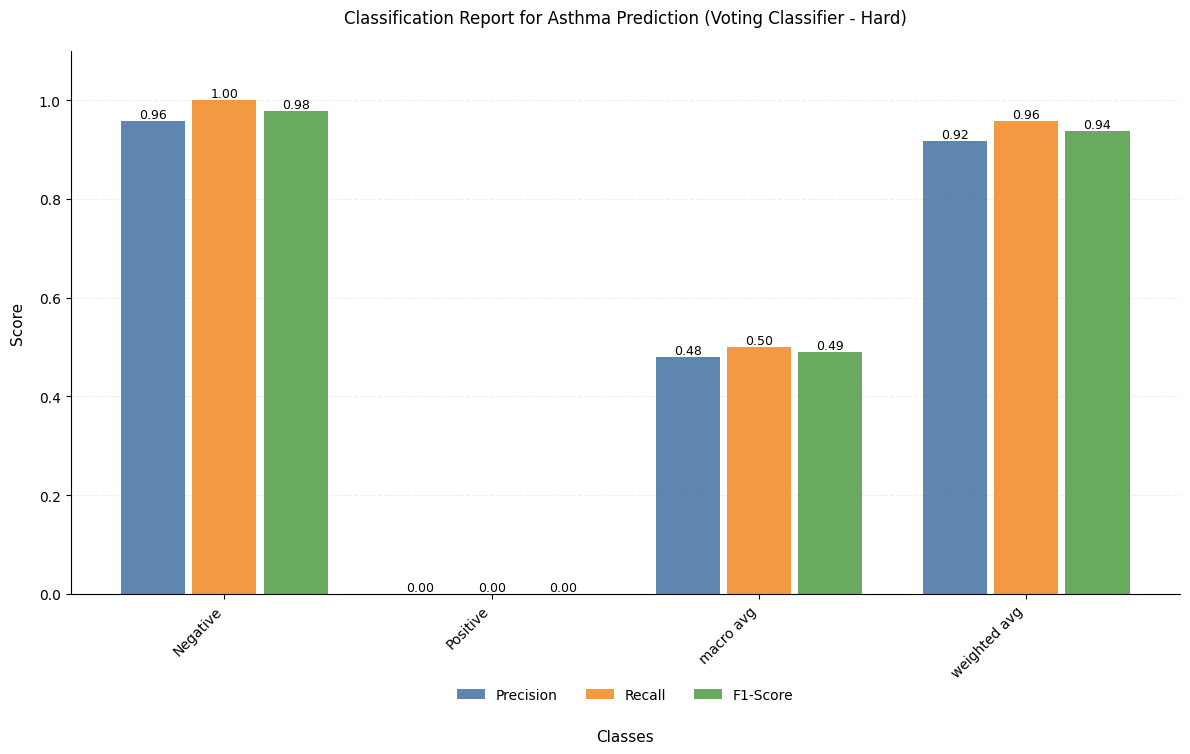

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def plot_classification_metrics(Y_test, y_pred):
    # Get classification report
    report = classification_report(Y_test, y_pred, output_dict=True)
    
    # Convert to dataframe and prepare data
    df = pd.DataFrame(report).transpose()
    df = df.drop(['support', 'accuracy'], errors='ignore')
    
    # Rename the classes
    df.rename(index={'0': 'Negative', '1': 'Positive'}, inplace=True)
    
    # Set style
    plt.style.use('default')
    
    # Create figure with increased height
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set position of bars
    x = np.arange(len(df.index))
    total_width = 0.8
    width = total_width / 3
    
    # Professional color scheme
    colors = ['#4e79a7', '#f28e2c', '#59a14f']  # Blue, Orange, Green
    
    # Create bars with correct labels
    bars1 = ax.bar(x - width, df['precision'], width * 0.9, 
                  label='Precision', color=colors[0], alpha=0.9)
    bars2 = ax.bar(x, df['recall'], width * 0.9, 
                  label='Recall', color=colors[1], alpha=0.9)
    bars3 = ax.bar(x + width, df['f1-score'], width * 0.9, 
                  label='F1-Score', color=colors[2], alpha=0.9)
    
    # Customize the plot
    ax.set_xlabel('Classes', fontsize=11, labelpad=35)
    ax.set_ylabel('Score', fontsize=11, labelpad=10)
    ax.set_title('Classification Report for Asthma Prediction (Voting Classifier - Hard)', fontsize=12, pad=20)

    
    # Set x-axis ticks with 45-degree rotation and more spacing
    plt.xticks(x, df.index, rotation=45, ha='right')
    
    # Add horizontal grid lines only
    ax.yaxis.grid(True, linestyle='--', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add value labels with better positioning
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                   f'{height:.2f}',
                   ha='center', va='bottom', fontsize=9,
                   fontweight='medium')
    
    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)
    
    # Customize legend with more space
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             ncol=3, frameon=False, fontsize=10)
    
    # Set y-axis limits with some padding
    plt.ylim(0, 1.1)
    
    # Set y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.2))
    
    # Adjust layout with significantly more bottom padding
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    
    return fig
fig = plot_classification_metrics(y_test, y_pred_voting_hard)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    
]

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,precision_score,recall_score

In [27]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


best_score=0
best_model=None
for model in models:
    model.fit(x_train_scaled,y_train)
    score=model.score(x_test_scaled,y_test)
    print(f'{model} - {score}')
    y_pred=model.predict(x_test_scaled)
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'F1 Score: {f1_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}')
    print(f'Classification Report: {classification_report(y_test,y_pred)}')
    print('------------------------------------------------------------------------------------------------------------')

    if score>best_score:
        best_score=score
        best_model=model
    print('------------------------------------------------------------------------------------------------------------')

print(f'Best Model: {best_model} - {best_score}')

LogisticRegression() - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: 
[[459   0]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       459
           1       0.00      0.00      0.00        20

    accuracy                           0.96       479
   macro avg       0.48      0.50      0.49       479
weighted avg       0.92      0.96      0.94       479

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier() - 0.8956158663883089
Accuracy Score: 0.8956158663883089
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: 
[[429  30]
 [ 20   0]]
Classification Report:               precision    recall  f1-score   support

      

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) - 0.9582463465553236
Accuracy Score: 0.9582463465553236
F1 Score: 0.09090909090909091
Precision Score: 0.5
Recall Score: 0.05
Confusion Matrix: 
[[458   1]
 [ 19   1]]
Classification Report:               precision    recall  f1-score   

In [28]:
best_model=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(x_train_scaled,y_train)

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
print('-----------------------------------------')
print(f'Best Model: {best_model}')
print(f"Results for {best_model}:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")


-----------------------------------------
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Results for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,

In [30]:
import joblib
joblib.dump(best_model,'../pickle_files/asthma_model.pkl')

['../pickle_files/asthma_model.pkl']

In [31]:
joblib.dump(scaler,'../pickle_files/asthma_scaler.pkl')

['../pickle_files/asthma_scaler.pkl']

In [32]:
# %pip install imblearn

In [33]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
# from imblearn.over_sampling import SMOTE


In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE

In [35]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [36]:
# models = [
#     ('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)),
#     ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)),
#     ('Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42)),
#     ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
#     ('AdaBoost', AdaBoostClassifier(random_state=42)),
#     ('KNN', KNeighborsClassifier()),  # KNN doesn't have class_weight parameter, will rely on SMOTE
#     ('SVC', SVC(class_weight='balanced', random_state=42)),
#     ('Gaussian NB', GaussianNB()),  # GaussianNB doesn't support class_weight, will rely on SMOTE
#     ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train) / sum(y_train == 1), random_state=42))
# ]

In [37]:
# for model_name, model in models:
#     # Train model
#     model.fit(X_train_resampled, y_train_resampled)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     print(f"Results for {model_name}:")
#     print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
#     print(f"F1 Score: {f1_score(y_test, y_pred)}")
#     print(f"Precision Score: {precision_score(y_test, y_pred)}")
#     print(f"Recall Score: {recall_score(y_test, y_pred)}")
#     print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
#     print("-" * 100)

In [38]:
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train) / sum(y_train == 1), random_state=42)

In [39]:
best_model.fit(X_train_resampled, y_train_resampled)

NameError: name 'X_train_resampled' is not defined

In [76]:
from sklearn.metrics import confusion_matrix

In [81]:
print('-----------------------------------------')
print(f'Best Model: {best_model}')
print(f"Results for {best_model}:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")


-----------------------------------------
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Results for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

y_train: 0's = 1809, 1's = 104
y_test: 0's = 459, 1's = 20


In [82]:
import joblib
joblib.dump(best_model,'../pickle_files/asthma_model.pkl')

['../pickle_files/asthma_model.pkl']